# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    x_squared_sinx = (x**2)*numpy.sin(x)
    return x_squared_sinx

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    integral_f = 2*x*numpy.sin(x) - ((x**2) - 2)*numpy.cos(x) - 2
    return integral_f

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    definite_integral_f = g(xmax) - g(xmin)
    return definite_integral_f

Check your analytic function:

In [10]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [11]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    simpson_array = numpy.linspace(xmin ,xmax ,(2*N)+1)
    panel_h = (xmax-xmin)/((2*N))
    dx = 2*panel_h
    even_array_item = f(simpson_array[1:(2*N):2])
    odd_array_item = f(simpson_array[2:(2*N):2])
    numeric_integral = (dx/6)*( f(xmin) + f(xmax) + 4*(sum(even_array_item))+ 2*(sum(odd_array_item)))
    
  
    return numeric_integral


Make sure you have implemented Simpson's rule correctly:

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,"Graph showing how increasing the number of panels in Simpson's Rule affects the fractional difference between Simpson's Rule and the analytical method")

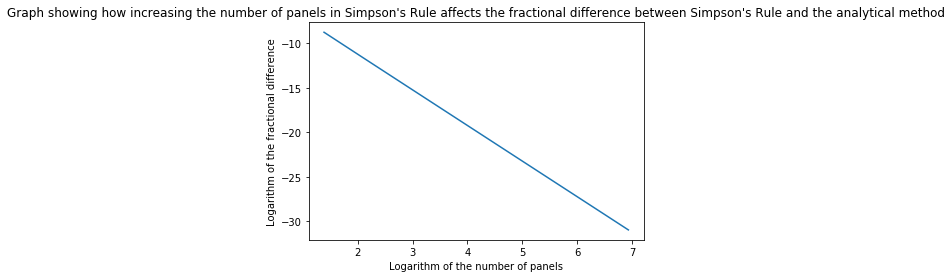

In [63]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use

result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

result_difference_array = numpy.array([])

for i in range(0, len(panel_counts)):
    
    result_numeric = integrate_numeric(x0, x1, panel_counts[i])
    fractional_difference = 1 - (result_numeric/result_analytic)
    
    result_difference_array = numpy.append(result_difference_array, fractional_difference)



plt.plot(numpy.log(panel_counts), numpy.log(result_difference_array))
plt.xlabel("Logarithm of the number of panels")
plt.ylabel("Logarithm of the fractional difference")
plt.title("Graph showing how increasing the number of panels in Simpson's Rule affects the fractional difference between Simpson's Rule and the analytical method")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

For N panels, the error on Simpson's Rule compared to the analytical method is proportional to N^-4, so as the number of panels increases, the accuracy also increases. If the number of panels is too large, we may encounter issues with rounding off, whereby the individual values for each panel are so small that they are not properly stored in the computer's memory and information may be lost when further calculations are undertaken, leading to a larger difference when compared to the analytical method than expected.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

For N panels, the error would instead scale with factor N^-2. This would lead to a lower accuracy than when compared to Simpson's Rule.